# RGB image compression

We first demonstrate how to separate an rgb image into 3 different channels of red, green, and blue, and how to combine these channels back to the original image. We then demonstrate how to obtain a grayscale image and compress it using FFT2.

In [1]:
from matplotlib.image import imread
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [5, 5]
plt.rcParams.update({'font.size': 12})

## Read in a file

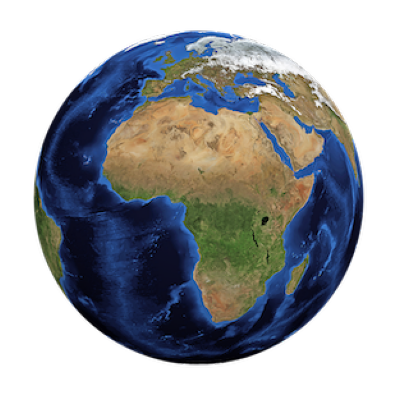

In [3]:
A = imread("Earth.png")
plt.figure()
plt.imshow(A)
plt.axis('off') # turns off axes
plt.show()

## Check the storage size in RAM

In [4]:
from PIL import Image 
import PIL 
from io import BytesIO

img_A = Image.fromarray(A)
img_file = BytesIO()
img_A.save(img_file, 'png') # true number of bytes in RAM, often different from file size on disk
image_file_size = img_file.tell()
print("The image takes up", image_file_size, "bytes in RAM.")

TypeError: Cannot handle this data type: (1, 1, 4), <f4

## Dimensions and RGB values

In [5]:
print("The dimensions of the original image is", img_A.size)
print(A) # each pixel has an r-g-b value

NameError: name 'img_A' is not defined

## Split color channels

In [6]:
redChannel = A[:,:,0]
greenChannel = A[:,:,1]
blueChannel = A[:,:,2]
print(redChannel)


[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


## Convert a color chanel to an image

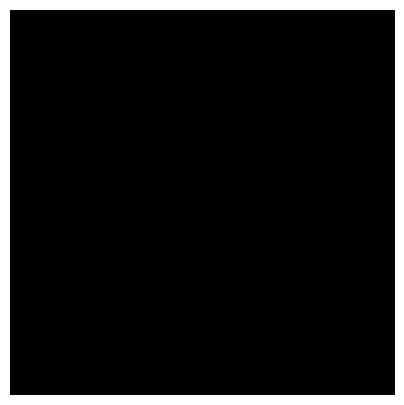

Earth.png takes up 691 bytes in RAM.


In [7]:
# Construct a list
Earth = []
for r in redChannel:
    row = []
    for i in r:
        row.append([i,0,0])
    Earth.append(row) 

# print(justRed)
# Convert list to image
Earth_img = np.array(Earth, dtype=np.uint8)
#print(justRed_img)
plt.figure()
plt.imshow(Earth_img)
plt.axis('off') # turns off axes
plt.show()

img_Earth  = Image.fromarray(Earth_img)
img_Earth.save("Earth.png") # save it to hard disk

img_file = BytesIO()
# quality='keep' is a Pillow setting that maintains the quantization of the image.
# Not having the same quantization can result in different sizes between the in-
# memory image and the file size on disk.

img_Earth.save(img_file, 'png') #'"Earth.jpg")
#image.save(img_file, 'png', quality='keep')
image_file_size = img_file.tell()
print("Earth.png takes up", image_file_size, "bytes in RAM.") # check the size

## Do the same for the green and blue channels

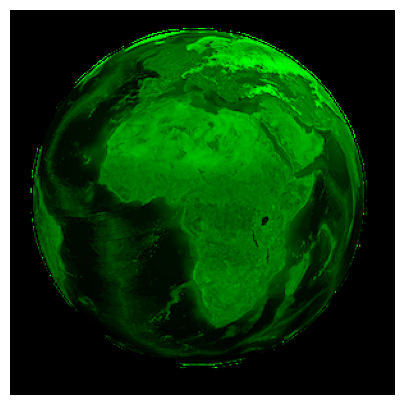

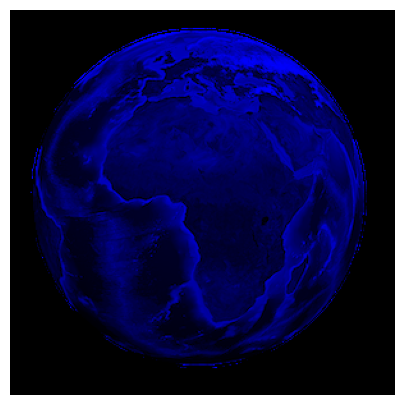

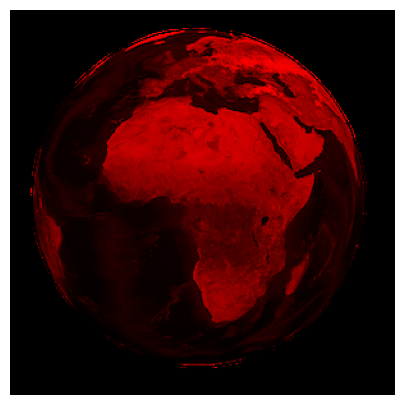

In [8]:
justGreen = []
for r in greenChannel:
    row = []
    for i in r:
        row.append([0,i,0])
    justGreen.append(row)     

justBlue = []
for r in blueChannel:
    row = []
    for i in r:
        row.append([0,0,i])
    justBlue.append(row) 
    
justRed = []                             #added red in here because previous code block from given code didn't work
for r in redChannel:
    row = []
    for i in r:
        row.append([i,0,0])
    justRed.append(row)

plt.figure(1)
plt.imshow(justGreen)
plt.axis('off') # turns off axes
plt.show()

plt.figure(2)
plt.imshow(justBlue)
plt.axis('off') # turns off axes
plt.show()

plt.figure(1)
plt.imshow(justRed)
plt.axis('off') # turns off axes
plt.show()

## Merge color images back to the original

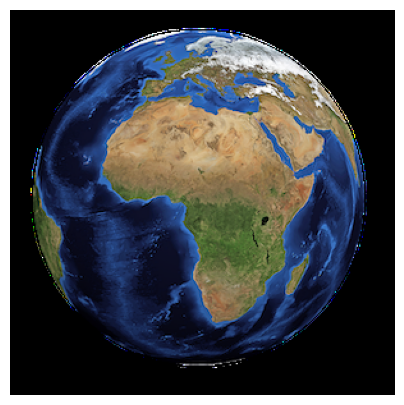

In [9]:
r_n = len(justRed)
comb_img = []
for i in range(r_n):
    comb_img.append([list(x) for x in zip(redChannel[i], greenChannel[i], blueChannel[i])])
#print(comb_img)   

plt.figure()
plt.imshow(comb_img)
plt.axis('off') # turns off axes
plt.show()

## Image compression

We demonstrate this on a grayscale image

In [10]:
B = np.mean(A, -1) #Convert RGB to gray by averaging r-g-b value for each pixel
# numpy.mean(arr, axis = None): Compute the arithmetic mean of the given data along the specified axis.
print(B)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


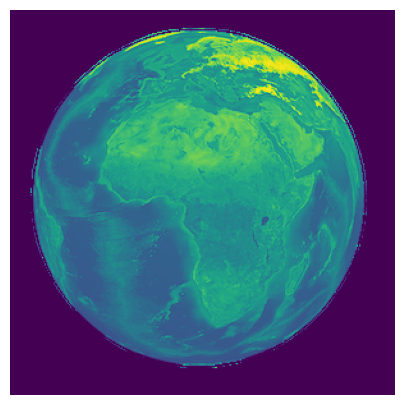

In [11]:
plt.figure()
plt.imshow(B)
plt.axis('off')
plt.show()

## Compression using fft2 and ifft2

[[ 26618.58373481   +0.j         -10044.58437056+1354.20913768j
   -2520.07113367 -917.36446174j ...   -858.63071842 +380.91073737j
   -2520.07113367 +917.36446174j -10044.58437056-1354.20913768j]
 [ -7963.73445842-4066.6625872j     965.45582886+1300.62757573j
    2325.59258714 +675.26261154j ...   1615.73497378 -531.16301167j
    1442.0658984  +409.78587552j    182.28060162+2131.58944155j]
 [ -3463.39117696 -429.15656384j   2504.36839241  +44.24954765j
     220.61338448 +217.66938015j ...   -442.2210863   +21.79114672j
    1840.78931237 -301.44854285j   1893.11069276 +929.39217017j]
 ...
 [  -938.4085657 +1089.06864528j   1163.38981806-1069.84430091j
    -113.08210639 +815.59263981j ...   -425.97052279 +381.92332025j
    -373.98997587 +240.8455233j     934.3892102 -1132.38939739j]
 [ -3463.39117696 +429.15656384j   1893.11069276 -929.39217017j
    1840.78931237 +301.44854285j ...   -306.4184958  +201.92541757j
     220.61338448 -217.66938015j   2504.36839241  -44.24954765j]
 [ -7963.7

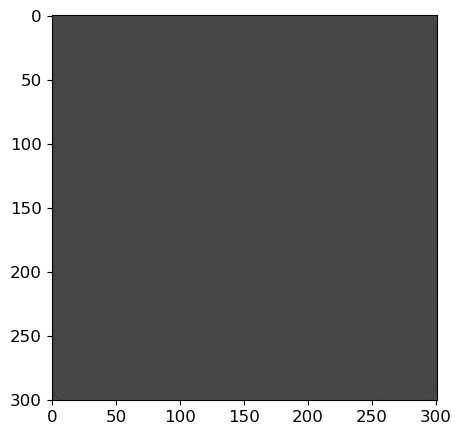

In [12]:
Bt = np.fft.fft2(B) # fast calculation of DFT of B using FFT2
print(Bt)
print(Bt.real)
Btsort = np.sort(np.abs(Bt.reshape(-1))) # sort by magnitude in increasing order
print("Btsort: ", Btsort)
print("Btsort length: ", len(Btsort))

plt.figure()
plt.imshow(Bt.real, cmap = 'gray')
plt.show()

## Set threshold

In [63]:
keep = 0.0025
thresh = Btsort[int(np.floor((1 - keep) * len(Btsort)))] # set the number of points to keep
print("thresh: ", thresh)
print("Bt min index:", np.where(Bt == np.min(Bt)))
print("Bt min occurs at (426,2):", Bt[300,2])                          #changed it from 426 to 300 because size is 301

thresh:  317.20647810034006
Bt min index: (array([0], dtype=int64), array([300], dtype=int64))
Bt min occurs at (426,2): (1442.0658983992225-409.78587551730686j)


In [64]:
ind = np.abs(Bt) > thresh # find small indeces
print("absolute value of Bt: ", np.abs(Bt))
print("Bt size:", len(Bt), len(Bt[0]))
print("ind =", ind)
print("ind size: ", len(ind))
Btlow = Bt * ind # set a point's value to zero if its absolute value <= thresh
print("Btlow dropped:", np.where(Btlow == 0))
print("Btlow at (0,19):", Btlow[0,19])
print('Btlow size: ', len(Btlow))
zerov_index = np.where(Btlow == 0)
print(zerov_index)
zero_points = list(zip((zerov_index)[0], zerov_index[1]))
print(zero_points) # these are the points being dropped

absolute value of Bt:  [[26618.58373481 10135.46040226  2681.84937579 ...   939.32938869
   2681.84937579 10135.46040226]
 [ 8941.96908529  1619.79537233  2421.6441679  ...  1700.8038248
   1499.15927076  2139.36901096]
 [ 3489.87876594  2504.75928332   309.91970649 ...   442.75765746
   1865.30869202  2108.9423655 ]
 ...
 [ 1437.59561432  1580.51975532   823.39475156 ...   572.11564289
    444.83150534  1468.12429428]
 [ 3489.87876594  2108.9423655   1865.30869202 ...   366.96889355
    309.91970649  2504.75928332]
 [ 8941.96908529  2139.36901096  1499.15927076 ...   865.43410895
   2421.6441679   1619.79537233]]
Bt size: 301 301
ind = [[ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 [ True  True False ...  True  True  True]
 ...
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True False  True]
 [ True  True  True ...  True  True  True]]
ind size:  301
Btlow dropped: (array([  0,   0,   0, ..., 300, 300, 300], dtype=int64), arr

Alow size:  301 301
Alow: [[256.00210195 256.00104711 255.99997184 ... 256.00440651 256.00384975
  256.00306011]
 [256.00094282 255.99968144 255.99841093 ... 256.00388988 256.00311912
  256.00211407]
 [255.99974715 255.99826776 255.9967943  ... 256.00339747 256.00238785
  256.00114718]
 ...
 [256.00466818 256.00419655 256.00370037 ... 256.00536246 256.0053053
  256.00505663]
 [256.00402893 256.0033649  256.00267225 ... 256.00521547 256.00501343
  256.00459916]
 [256.00315321 256.00229624 256.00141214 ... 256.00487315 256.00450549
  256.00391203]]


Text(0.5, 1.0, 'Compressed image: keep =0.26%')

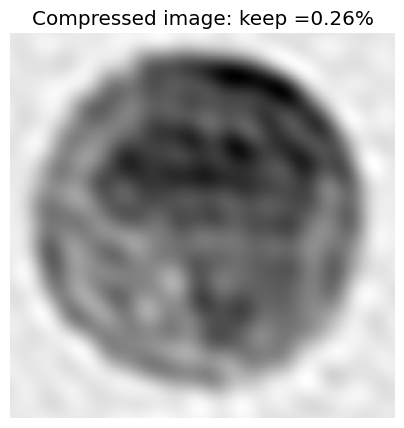

In [62]:
Alow = np.fft.ifft2(Btlow).real # fast inverse DFT on Atlow for compression
#print('Alow =', Alow)
plt.figure()
print('Alow size: ', len(256-Alow), len((256-Alow)[0]))
print("Alow:", 256 - Alow)
plt.imshow(256 - Alow, cmap = 'gray')
plt.axis('off')
plt.title('Compressed image: keep =' + str(keep*100) + '%')

## Effects of various compression percentages

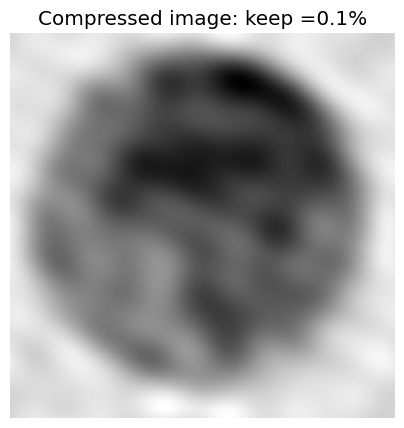

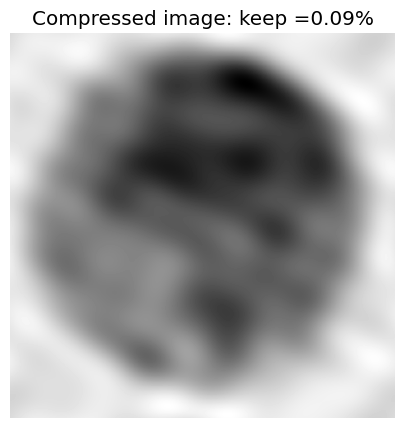

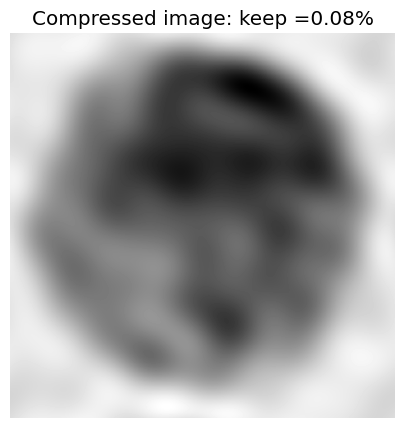

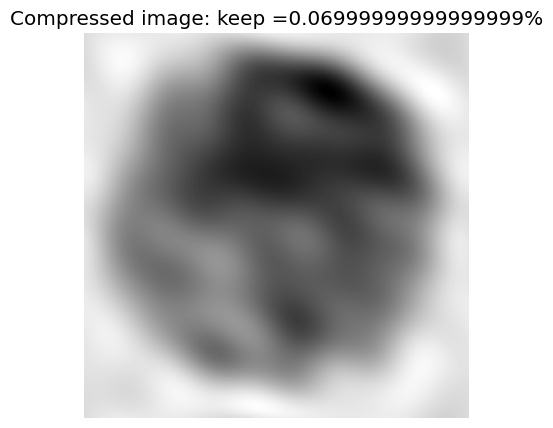

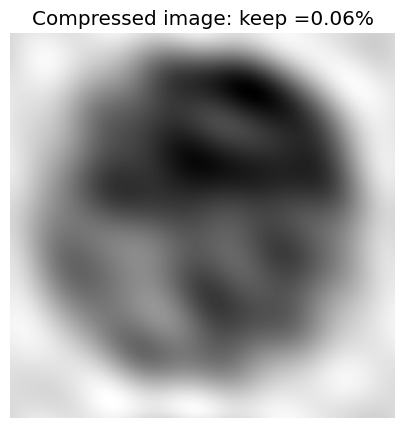

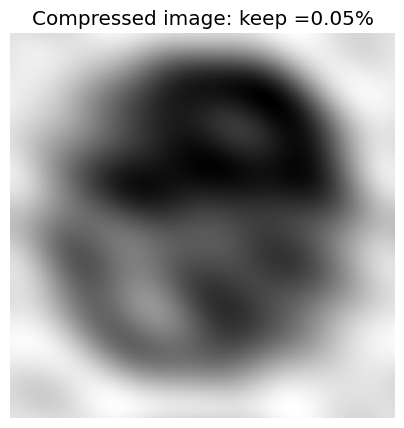

In [65]:
# Zero out all small coefficients and inverse DFT
for keep in (0.001, 0.0009, 0.0008, 0.0007, 0.0006, 0.0005): # keep 10%, 5%, 1%, 0.5%, 0.01%
    thresh = Btsort[int(np.floor((1 - keep) * len(Btsort)))]
    ind = np.abs(Bt) > thresh # find small indeces
    Btlow = Bt * ind # threshold small indeces
    Alow = np.fft.ifft2(Btlow).real # fast inverse DFT on Atlow for compression

    plt.figure()
    plt.imshow(256 - Alow, cmap = 'gray')
    plt.axis('off')
    plt.title('Compressed image: keep =' + str(keep*100) + '%')
    plt.show()

I replaced the Elizabeth tower image with the earth image in the given code. I am not sure why i am getting an error in the Check the storage size in RAM section and in the Dimensions and RGB values section up top.

Also when i open Anaconda, the Earth image is black and i have to reload the page. 

For testing out the percentages. I started with 0.5, 0.4, 0.3, 0.2, 0.1, 0.05. At 10% and 5% it starts getting fuzzy, but still able to make out what the image is. Than i use the values/percentages of 0.05, 0.04, 0.03, 0.02, 0.01, 0.009. They get more fuzzy but I am still able to make out the continent of Africa. The matrix still shows all True for 0.009.

Next values i use are 0.008, 0.007, 0.006, 0.005, 0.004, 0.003. From 0.004, it gets a bit difficult to see what the entire image is, but can still slight make out Africa.

Nect values i use are 0.002, 0.001, 0.0009, 0.0008, 0.0007, 0.0006. From 0.002, its very fuzzy and can't really see what the image is. This is also when the first False shows up in the matrix.

I go slightly more specific with the values and try 0.0029, 0.0028, 0.0027. 0.0026, 0.0025, 0.0024. I had trouble trying to see what image it was at value 0.0028. The first False comes up at the 0.0025. 

It gets more fuzzy from 0.001, its basically a black blur from 0.005. 